In [1]:
import numpy as np
import csv

npz_file = "/Users/Djslime07/HVC_Project/data_lime_multispec_lb_101_-50_20250107_mjd_60682_LST_235900_4096_17578_260_10_g_10.npz"
output_csv = "/Users/Djslime07/HVC_Project/extracted_data.csv"

keys_to_extract = ["lstvec", "datevec", "timevec", "mjdvec", "ravec", "decvec", "lvec", "bvec", "azvec", "elvec"]
with np.load(npz_file) as data:
    available_keys = list(data.keys())
    missing_keys = [key for key in keys_to_extract if key not in available_keys]
    
    if missing_keys:
        print(f"Warning: The following keys are missing from the NPZ file: {missing_keys}")

    extracted_data = {key: data[key] for key in keys_to_extract if key in available_keys}

with open(output_csv, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Index"] + [key for key in extracted_data.keys()])
    max_rows = max(arr.shape[0] for arr in extracted_data.values())

    for i in range(max_rows):
        row = [i] 
        for key in extracted_data:
            if i < extracted_data[key].shape[0]: 
                value = extracted_data[key][i]
                if isinstance(value, np.ndarray):  
                    value = ",".join(map(str, value))
            else:
                value = ""  
            row.append(value)
        writer.writerow(row)

print(f"Extraction complete. Data saved to {output_csv}")

Extraction complete. Data saved to /Users/Djslime07/HVC_Project/extracted_data.csv


In [ ]:
import numpy as np
import csv

npz_file = "/Users/Djslime07/HVC_Project/data_lime_multispec_lb_101_-50_20250107_mjd_60682_LST_235900_4096_17578_260_10_g_10.npz"
with np.load(npz_file) as data:
    frequency_key = data["freq"]
    print("Frequency data:", frequency_key)
    gain_key = data["gain"]
    print("Gain data:", gain_key)
    available_keys = list(data.keys())
    print("Available keys in the NPZ file:")
    for key in available_keys:
        print(key)
    frequency_key = "freqvec"   

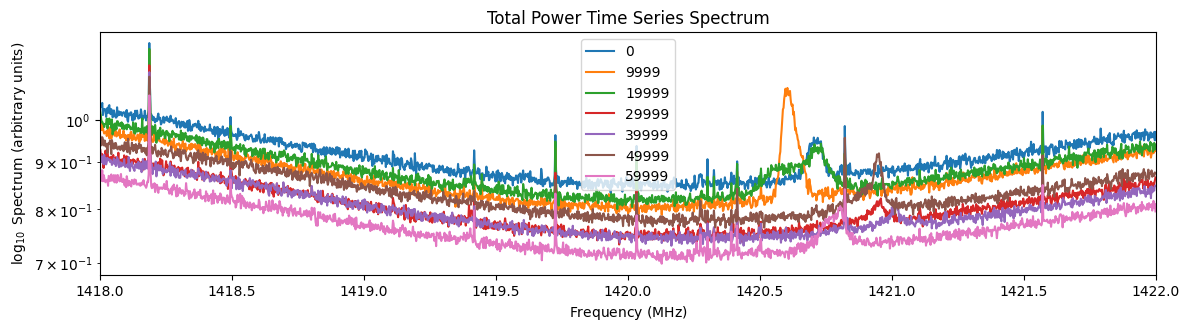

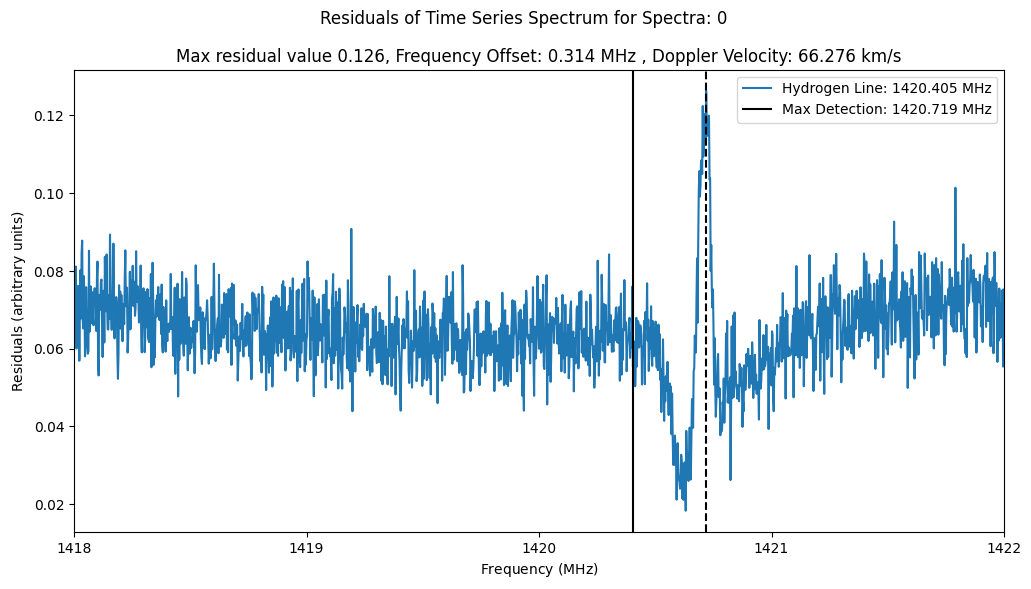

Spectra 0: Max residual value 0.12630854379733403 at frequency 1420.7187973137973 MHz, Doppler Velocity: 66.28 km/s


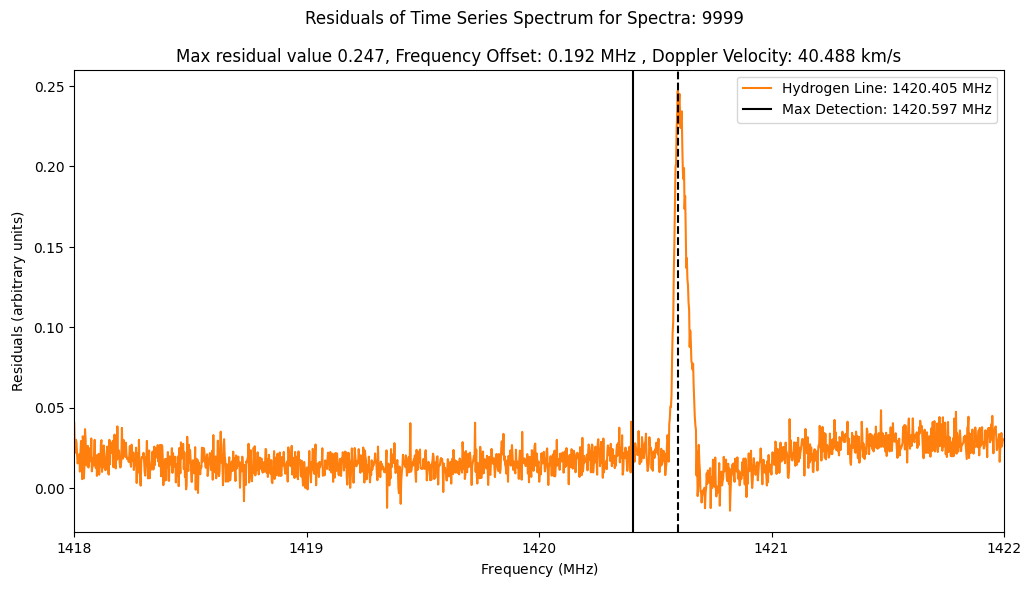

Spectra 9999: Max residual value 0.24698990841507906 at frequency 1420.596697191697 MHz, Doppler Velocity: 40.49 km/s


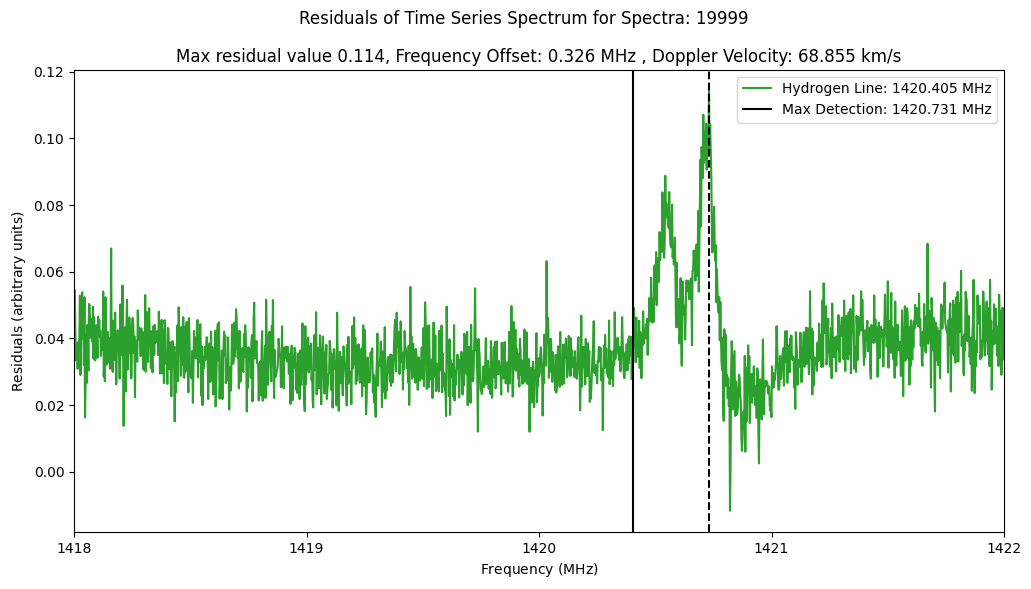

Spectra 19999: Max residual value 0.1142681752552589 at frequency 1420.7310073260073 MHz, Doppler Velocity: 68.86 km/s


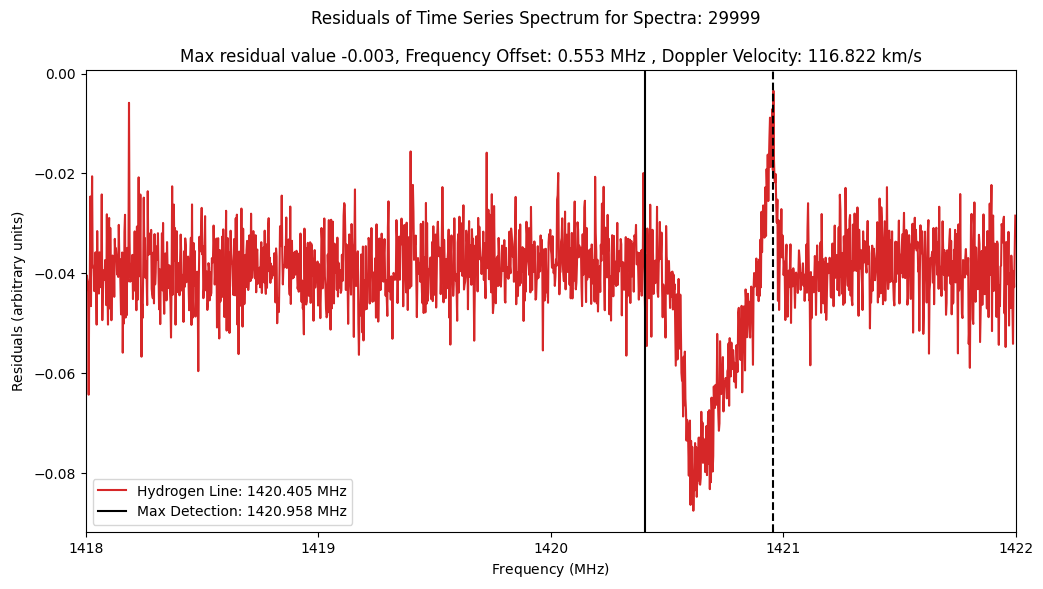

Spectra 29999: Max residual value -0.003445515658458076 at frequency 1420.9581135531134 MHz, Doppler Velocity: 116.82 km/s


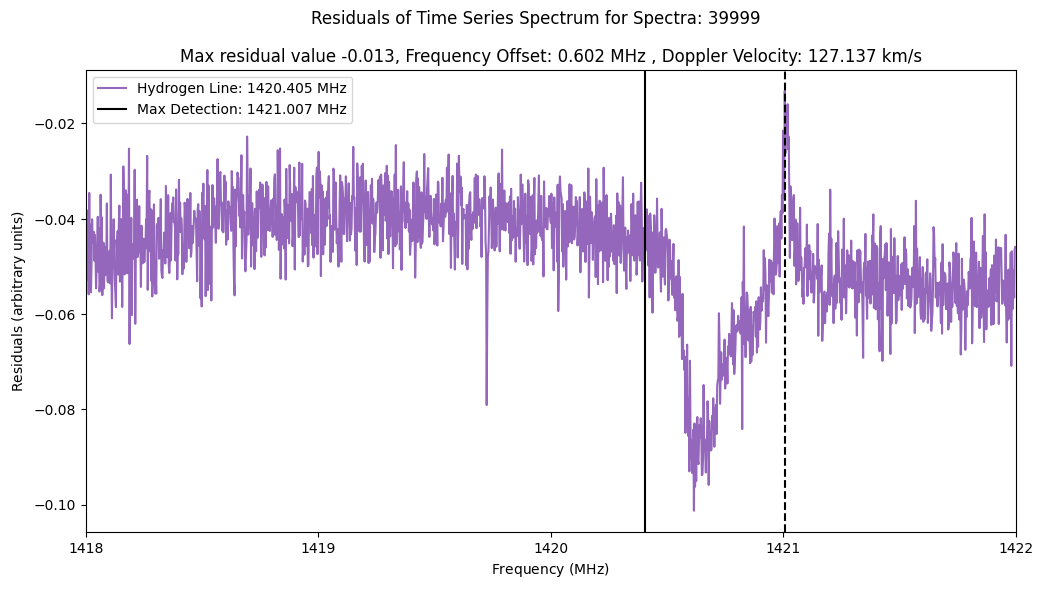

Spectra 39999: Max residual value -0.013120959059397364 at frequency 1421.0069536019537 MHz, Doppler Velocity: 127.14 km/s


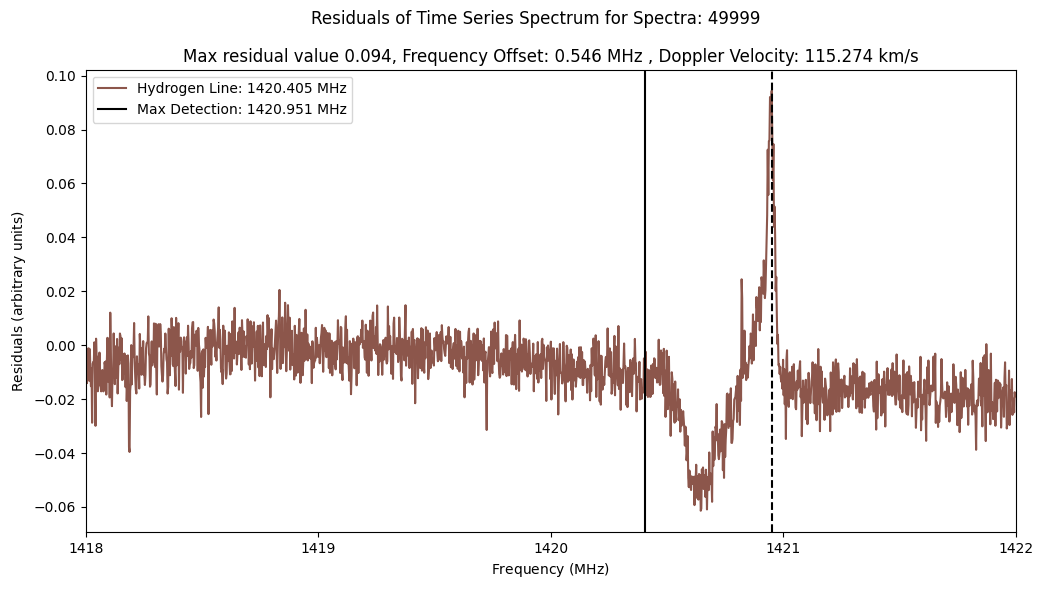

Spectra 49999: Max residual value 0.09441620225310321 at frequency 1420.9507875457875 MHz, Doppler Velocity: 115.27 km/s


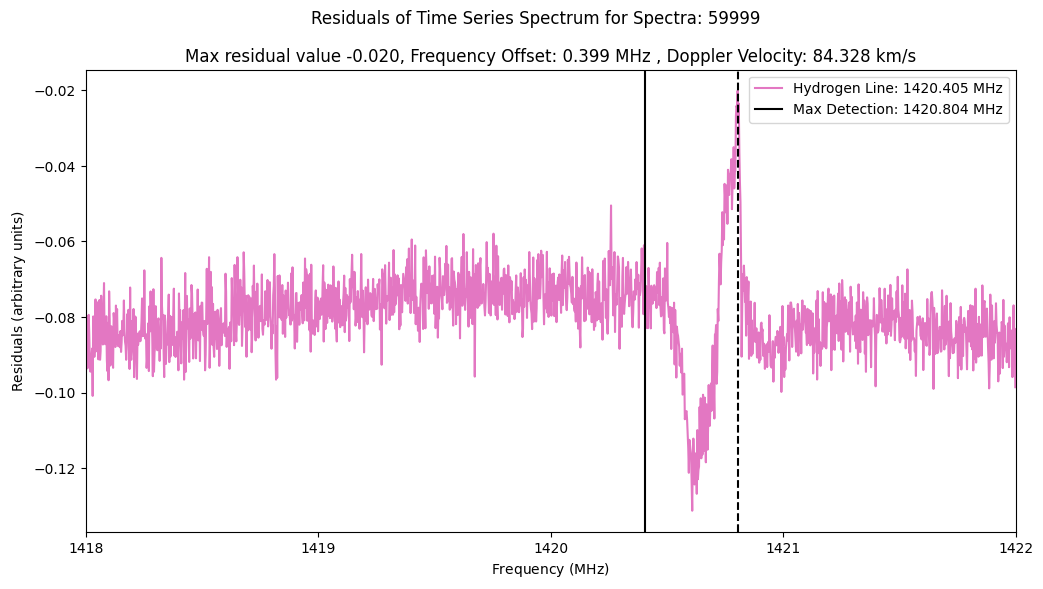

Spectra 59999: Max residual value -0.02009008324245609 at frequency 1420.8042673992675 MHz, Doppler Velocity: 84.33 km/s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("/Users/Djslime07/HVC_Project/data_lime_multispec_lb_101_-50_20250107_mjd_60682_LST_235900_4096_17578_260_10_g_10.npz")
output_csv = "/Users/Djslime07/HVC_Project/SNR.csv"

spectra = data["spectra"]
mean_spectrum = np.mean(spectra, axis=0)

residuals = spectra - mean_spectrum

num_bins = spectra.shape[1]
bandwidth = 10  
center_frequency = 1420.405  
freqs = np.linspace(center_frequency - bandwidth / 2, center_frequency + bandwidth / 2, num_bins)

freq_range_mask = (freqs >= 1418) & (freqs <= 1422)
filtered_freqs = freqs[freq_range_mask]
filtered_spectra = spectra[:, freq_range_mask]
filtered_residuals = residuals[:, freq_range_mask]

indices = [0, 9999, 19999, 29999, 39999, 49999, 59999]

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
lines = []
for i in indices:
    line, = plt.plot(filtered_freqs, filtered_spectra[i])
    lines.append(line)
plt.yscale('log')
plt.xlabel(r'$\rm Frequency \ (MHz)$')
plt.ylabel(r'$\rm \log_{10} \ Spectrum \ (arbitrary\ units)$')
plt.title("Total Power Time Series Spectrum")
plt.xlim(1418, 1422)  
plt.legend(["0", "9999", "19999", "29999", "39999", "49999", "59999"])

plt.tight_layout()
plt.show() 

for i, line in zip(indices, lines):
    max_residual_index = np.argmax(filtered_residuals[i])
    max_residual_frequency = filtered_freqs[max_residual_index]
    max_residual_value = filtered_residuals[i][max_residual_index]

    offset = max_residual_frequency - center_frequency
    if offset > 0:
        offset_str = f"+{offset:.3f}"
    else:
        offset_str = f"{offset:.3f}"
        
    c = 3e5 
    doppler_velocity = c * (max_residual_frequency - center_frequency) / center_frequency 
    
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_freqs, filtered_residuals[i], color=line.get_color())
    plt.xlabel(r'$\rm Frequency \ (MHz)$')
    plt.ylabel(r'$\rm Residuals \ (arbitrary\ units)$')
    plt.suptitle(f"Residuals of Time Series Spectrum for Spectra: {i}")
    plt.title(f"Max residual value {max_residual_value:.3f}, Frequency Offset: {offset:.3f} MHz , Doppler Velocity: {doppler_velocity:.3f} km/s")
    plt.xlim(1418, 1422)  
    plt.xticks(np.arange(1418, 1423, 1))  
    plt.axvline(x=1420.405, color='k', label='Hydrogen Line')
    plt.axvline(x=max_residual_frequency, color='k', linestyle="dashed", label='Max Detection')
    plt.legend(["Hydrogen Line: 1420.405 MHz", f"Max Detection: {max_residual_frequency:.3f} MHz"])
    plt.show()
    
    print(f"Spectra {i}: Max residual value {max_residual_value} at frequency {max_residual_frequency} MHz, Doppler Velocity: {doppler_velocity:.2f} km/s")